

<div class="markdown-google-sans">

</div>



<br/>
Data : https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset?select=cs-training.csv<br/>

Context
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

 <br />

## 1. Overview Data Task

Question 1: Make the necessary steps to understand the data (suggested the following steps but no need to follow exactly) 
- Observe the lines of the data
- Total rows and columns 
- Data type of each column 

## 2. Clean Data Task
- RevolvingUtilizationOfUnsecuredLines: 
  + Def: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
  + Is there any missing value/outlier in this feature? 
  + How should we deal with special values in this feature?

- DebtRatio: 
  + Def: Monthly debt payments, alimony,living costs divided by monthy gross income
  + Is there any missing value/outlier in this feature? 
  + How should we deal with special values in this feature?

- MonthlyIncome: 
  + Def: Monthly income
  + Is there any missing value/outlier in this feature? 
  + How should we deal with special values in this feature?

## 3. Univariate Analysis Task
- Perform univariate analysis to the features in the data and find the insights
- Suggestions: 
  + Start with the dependent variable, and then to the independent variables
  + Find the distribution of the variables

## 4. Bivariate Analysis Task
- Perform bivariate analysis between the dependent variable and the independent variables 
- Suggestions: 
  + No suggestion for this part. Just go as wild as you can


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

sns.set(color_codes=True)

In [2]:
df = pd.read_csv("C:/Users/ASUS/OneDrive/MĐ PYTHON/HW Clean Data/cs-training.csv")

In [3]:
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [4]:
df.shape

(150000, 12)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0



## 3.1 Revolving Utilization Of Unsecured Lines

In [8]:
# nó là tỷ lệ quay vòng ( so sánh giữa số tín dụng sử dụng và tổng hạn mức tín dụng)
# ==> nó chỉ có thể chạy từ 0-->1 

In [9]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

# ==> Điều này là vô lý vì max chỉ có thể là 1

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

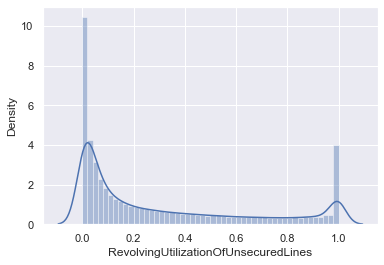

In [10]:
df3=df[df['RevolvingUtilizationOfUnsecuredLines'] <=1]
sns.distplot(df3['RevolvingUtilizationOfUnsecuredLines'])


In [11]:
len(df[(df['RevolvingUtilizationOfUnsecuredLines']>1)])

3321

this shows that about 3300 out of 150k observations got values more than 1 and hence it is not appropriate to consider all these as outliers and cap to 1. A better approach is to make these missing and impute the values

In [12]:
# Fill Missing into the variables > 1
# ==> các giá trí lớn hơn 1 sẽ bị null 
def replace_1(x):
    if x > 1:
        return np.nan
    else:
        return x

In [13]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(replace_1)
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    146679.000000
mean          0.303782
std           0.337892
min           0.000000
25%           0.028608
50%           0.144476
75%           0.519980
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [14]:
#For imputation, we will use ffill method which will retain the distribution and mean of the variable.

df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)

df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

# DebtRatio:

* Def: Monthly debt payments, alimony,living costs divided by monthy gross income
* Is there any missing value/outlier in this feature?
* How should we deal with special values in this feature?*

## 3.2 DebtRatio

In [15]:
# the lower value of 0 is fine but max value is ridiculous as it is rarley more than 1

df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

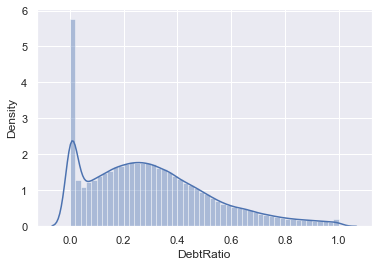

In [16]:
df2 = df[df['DebtRatio']<=1]
sns.distplot(df2['DebtRatio'])

In [17]:
df2=df[df['DebtRatio']>1]

df2['DebtRatio'].describe()

count     35137.000000
mean       1505.989566
std        3999.026847
min           1.000500
25%          42.000000
50%         907.000000
75%        2210.000000
max      329664.000000
Name: DebtRatio, dtype: float64

Typical value of Debt Income ratio is 0.4. But almost 35000 observations got values higher than 1 and hence cannot be treated as outliers. Best approach right now is to leave this feature alone, later when we do the analysis and see that this feature has impact on the dependent variable, we will deal with the outliers. However, if you insist on dealing with the outliers right now, you can do the same as we did with RevolvingUtilizationOfUnsecuredLines

## 3.3 Monthly Income

In [18]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

There are missing values and Max value is too large. Min value of 0 is not ok as finance industry expect a minimum income of 1000.

In [19]:
df['MonthlyIncome'].isnull().sum()

29731

In [20]:
len(df[df['MonthlyIncome']<1000])

4428

Number of obs below 1000 is too large. hence, it is not ok to treat it as outliers and cap to 1000. Lets treat it as missing and then impute the values.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

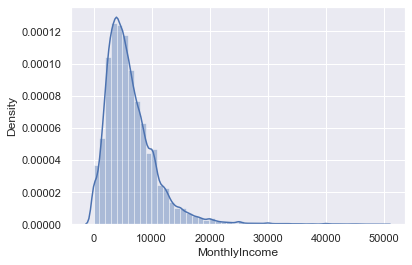

In [21]:
# Distribution shows that income smoothly decreases upto 25000 and then few outliers of huge values.

df2 = df[df['MonthlyIncome']<50000]
sns.distplot(df2['MonthlyIncome'].dropna())

In [22]:
# Change all the income values > 25k to 25k

df.loc[df['MonthlyIncome']>25000, 'MonthlyIncome']=25000
df['MonthlyIncome'].describe()

count    120269.000000
mean       6349.112332
std        4358.376183
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8249.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [23]:
# Change all the income values < 1000 to NaN 

df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
df['MonthlyIncome'].describe()

count    115841.000000
mean       6579.317737
std        4275.154379
min        1000.000000
25%        3600.000000
50%        5513.000000
75%        8334.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [24]:
# Fill the NaN values with mean of income values 

df['MonthlyIncome'].fillna(method='ffill', inplace=True)
df['MonthlyIncome'].describe()

count    150000.000000
mean       6578.107227
std        4286.321398
min        1000.000000
25%        3600.000000
50%        5500.000000
75%        8333.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

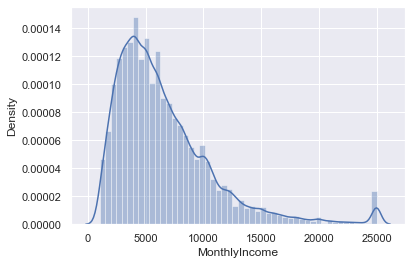

In [25]:
# The distribution makes much more sense now 

sns.distplot(df['MonthlyIncome'])

In [26]:
# Finish Cleaning the data
df.loc[df['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines']=5
df.loc[df['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30

df.loc[df['NumberOfDependents']>5, 'NumberOfDependents']=5
df['NumberOfDependents'].fillna(method='ffill', inplace=True)

# Univariate Analysis Task
* Perform univariate analysis to the features in the data and find the insights
* Suggestions:
- Start with the dependent variable, and then to the independent variables
- Find the distribution of the variables

In [27]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,5,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,25000.0,7,0,1,0,0.0


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

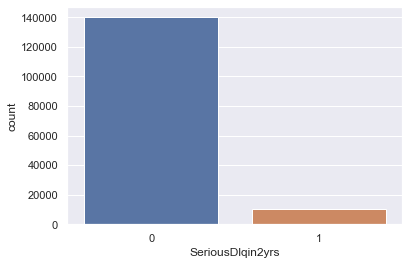

In [28]:
#we will start with the dependent variable 

sns.countplot(x='SeriousDlqin2yrs', data=df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


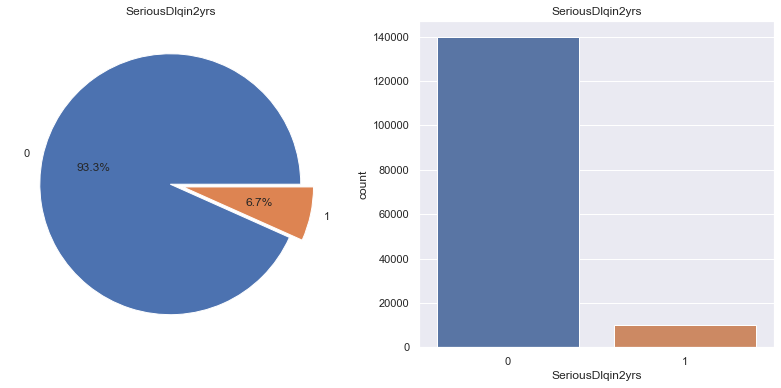

In [37]:
#About 6.7% customers were delinquents.

f,ax=plt.subplots(1,2,figsize=(14,6))

df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
# Vẽ pie chart by Series

sns.countplot('SeriousDlqin2yrs',data=df,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show();

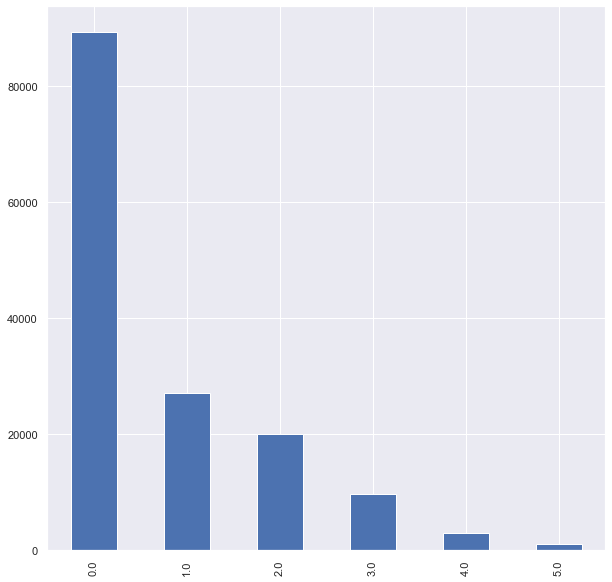

In [43]:
df['NumberOfDependents'].value_counts().plot(kind='bar', figsize = (10,10));

<AxesSubplot:>

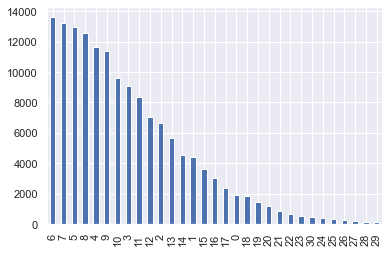

In [53]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts().plot(kind = 'bar')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

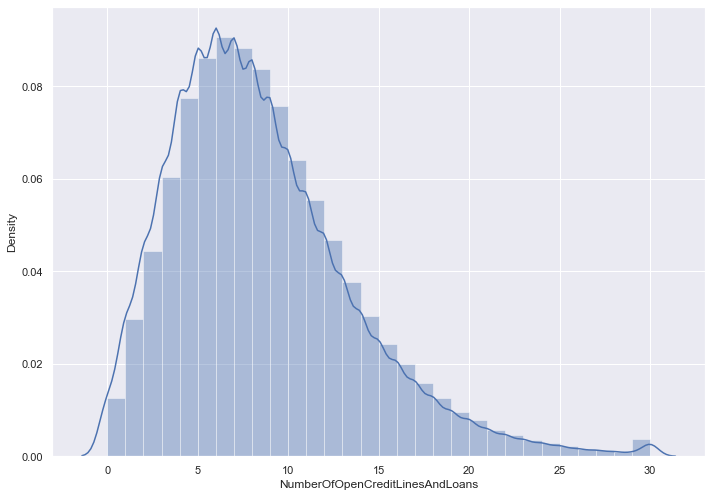

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'],bins= 30)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

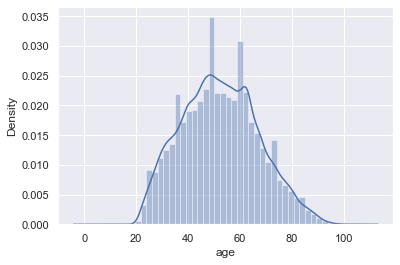

In [48]:
sns.distplot(df['age'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

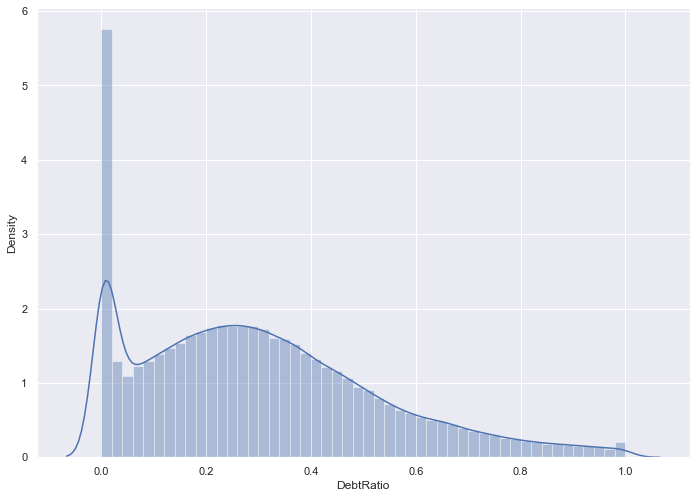

In [61]:
df2=df[df['DebtRatio']<=1]
sns.distplot(df2['DebtRatio'])

## 5.1 SeriousDlqin2yrs vs RevolvingUtilizationOfUnsecuredLines

Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

In [62]:
df.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.282806
1,10026,0.594927


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

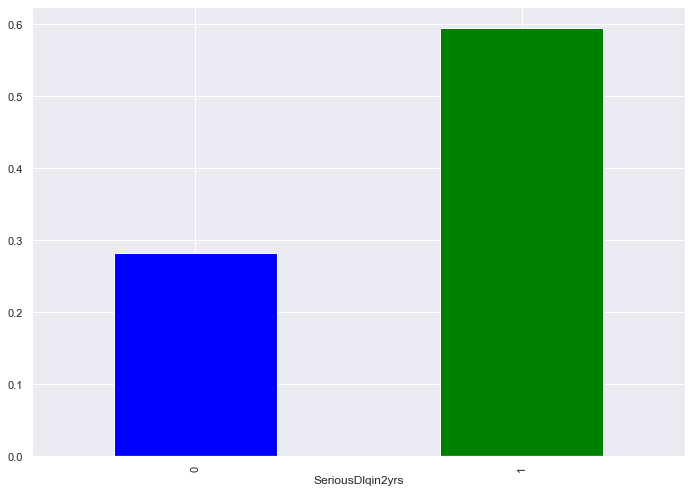

In [76]:
df.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].mean().plot(kind='bar', color=['blue', 'green'])

#################################
####################
                                                ### Kiến thức mới ##
############################
#################################   

In [65]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [66]:
def cat_ruul(ruul):
    if ruul <0.03:
        return 1
    elif 0.03<= ruul <0.14:
        return 2
    elif 0.14<= ruul <0.52:
        return 3
    else:
        return 4

In [67]:
df['ruul_cat'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ruul_cat
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,5,0,2.0,4
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,4
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,4


In [68]:
df.groupby('ruul_cat')['RevolvingUtilizationOfUnsecuredLines'].agg(['min','max'])

,min,max
ruul_cat,,
1,0.000000,0.030000
2,0.030006,0.139999
3,0.140022,0.519983
4,0.520023,1.000000


In [77]:
pd.crosstab(df.SeriousDlqin2yrs, df.ruul_cat, normalize='columns')

ruul_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.973692,0.972357,0.946664,0.84043
1,0.026308,0.027643,0.053336,0.15957


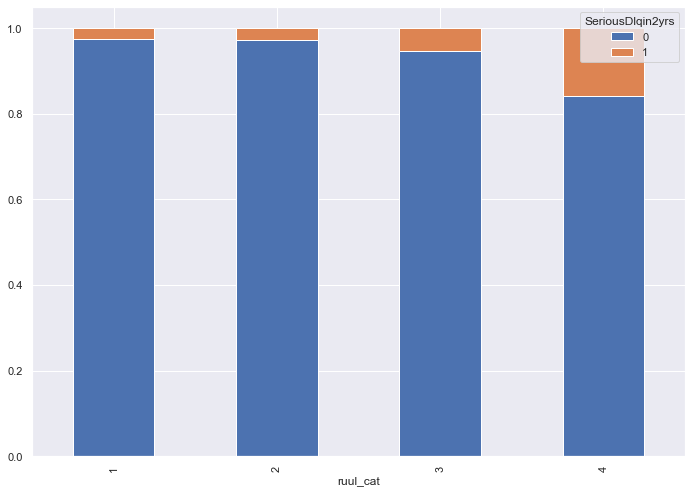

In [79]:
sb=pd.crosstab(df.ruul_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True);

As expected, plot shows that there are more delinquents in the category of highest utilization. However there is not much difference between the fiirst two categories.

## 5.2 SeriousDlqin2yrs vs Age

In [80]:
df.groupby('SeriousDlqin2yrs')['age'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,52.751375
1,10026,45.926591


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

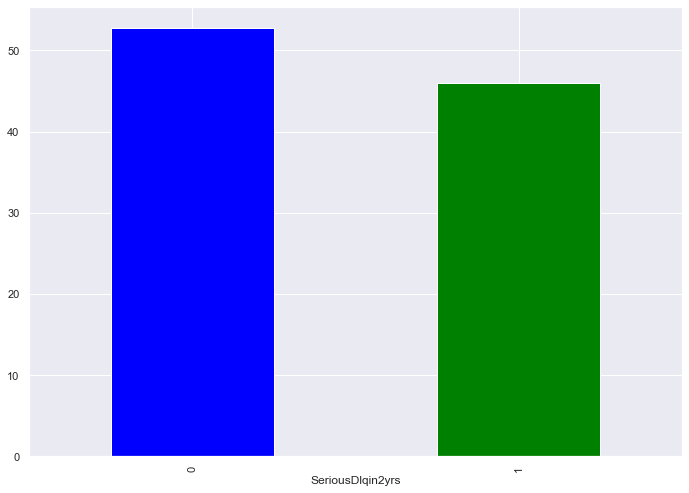

In [81]:
df['age'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green'])

Delinquent cusomters are younger than non-delinquent customers.

In [83]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [84]:
def cat_ruul(ruul):
    if ruul <41:
        return 1
    elif 41<= ruul <52:
        return 2
    elif 52<= ruul <63:
        return 3
    else:
        return 4

In [85]:
df['age_cat'] = df['age'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ruul_cat,age_cat
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,5,0,2.0,4,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,4,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,4,1


In [86]:
# lets check if the categorization was done correctly
df.groupby('age_cat')['age'].agg(['min','max'])

,min,max
age_cat,,
1,0,40
2,41,51
3,52,62
4,63,109


In [87]:
pd.crosstab(df.SeriousDlqin2yrs, df.age_cat, normalize='columns')

age_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.896458,0.918115,0.942146,0.973347
1,0.103542,0.081885,0.057854,0.026653


<AxesSubplot:xlabel='age_cat'>

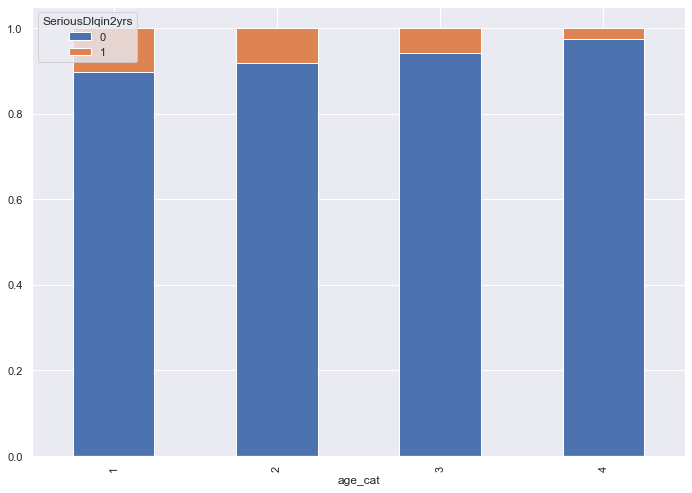

In [88]:
sb=pd.crosstab(df.age_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

Plot shows that there are more proportion of delinquents in the category of youngest age. Delinquency decreases as age increases uniformly.

In [89]:
df.age_cat.info

<bound method Series.info of 0         2
1         1
2         1
3         1
4         2
         ..
149995    4
149996    2
149997    3
149998    1
149999    4
Name: age_cat, Length: 150000, dtype: int64>